In [1]:
import gzip
import shutil
import os
import nibabel as nib
from tifffile import imsave, imread
import numpy as np
import matplotlib.pyplot as plt
import imageio
from PIL import Image
from array2gif import write_gif
%matplotlib inline


def make_dir(path):
    if(not os.path.isdir(path)):
        os.makedirs(path)
        

folder_name='MICCAI_BraTS2020_TrainingData'
dataset_path = 'dataset'

main_dir=os.listdir(folder_name)
make_dir(dataset_path)
for folder in main_dir:
    cur_dir = os.path.join(folder_name,folder)
    cur_dir_files = os.listdir(cur_dir)
    for i,file in enumerate(cur_dir_files):
        
        file_path = os.path.join(cur_dir, file)   
        if 'seg' in file_path:   
            #print(file)
            imgVol = nib.load(file_path)
            npdata = imgVol.get_fdata()
            npdata=npdata.astype(np.uint8)
            x=npdata.shape[0]
            y=npdata.shape[1]
            n=npdata.shape[2]
            array=np.zeros((x,y,3,n))
            array[:,:,0,:]=np.where(npdata==1,255*np.ones((x,y,n)),np.zeros((x,y,n)))
            array[:,:,1,:]=np.where(npdata==2,255*np.ones((x,y,n)),np.zeros((x,y,n)))
            array[:,:,2,:]=np.where(npdata==4,255*np.ones((x,y,n)),np.zeros((x,y,n)))
            array=array.astype(np.uint8)
            array=array.transpose(3,0,1,2)
            #print(array.shape)
            #plt.imshow(array[:,:,:,51])
            #write_gif(array.transpose((3,0,1,2)),f'movie{i}.gif',fps=300)
            save_path=os.path.join(dataset_path,'segmentation',file)
            for j, image in enumerate(array):
                #print(image.shape)
                im = Image.fromarray(image)
                im.save(save_path + str(j) + '.png')
        else:
            continue           
        #imageio.mimsave(f'movie{i}.gif', npdata.transpose(2,0,1)) 

NotADirectoryError: [WinError 267] The directory name is invalid: 'MICCAI_BraTS2020_TrainingData\\name_mapping.csv'

In [ ]:
import gzip
import shutil
import os
import nibabel as nib
from tifffile import imsave, imread
import numpy as np
import matplotlib.pyplot as plt
import imageio
from array2gif import write_gif
%matplotlib inline
from PIL import Image


def make_dir(path):
    if(not os.path.isdir(path)):
        os.makedirs(path)
        
image_types=['flair', 'segmentation', 't1', 't1ce', 't2']
folder_name='MICCAI_BraTS2020_TrainingData'
dataset_path = 'dataset'

main_dir=os.listdir(folder_name)
make_dir(dataset_path)
for image_type in image_types:
    make_dir(os.path.join(dataset_path, image_type))

for folder in main_dir:
    cur_dir = os.path.join(folder_name,folder)
    cur_dir_files = os.listdir(cur_dir)
    for i,file in enumerate(cur_dir_files):
        print(file)
        file_path = os.path.join(cur_dir, file)   
        save_path = os.path.join(dataset_path, image_types[i],file)    
        imgVol = nib.load(file_path)
        npdata = imgVol.get_fdata()
        npdata=npdata.astype(np.uint8)
        for j, image in enumerate(npdata.transpose(2,0,1)):
            im = Image.fromarray(image)
            im.save(save_path+str(j)+'.png')
        if 'seg' in file_path:
            break

BraTS20_Training_001_flair.nii.gz
BraTS20_Training_001_seg.nii.gz
BraTS20_Training_002_flair.nii.gz
BraTS20_Training_002_seg.nii.gz
BraTS20_Training_003_flair.nii.gz
BraTS20_Training_003_seg.nii.gz
BraTS20_Training_004_flair.nii.gz
BraTS20_Training_004_seg.nii.gz
BraTS20_Training_005_flair.nii.gz
BraTS20_Training_005_seg.nii.gz
BraTS20_Training_006_flair.nii.gz
BraTS20_Training_006_seg.nii.gz
BraTS20_Training_007_flair.nii.gz


In [4]:
import torch.nn as nn
import torch.nn.functional as F
import torch
import numpy as np
from model import *
from create_dataloader import *
import torch.optim as optim
from utils import *
from torch.utils.tensorboard import SummaryWriter
from tqdm import tqdm
from loss import *
%load_ext autoreload
%autoreload 2
flair_imgs_dir = './dataset/flair'
t1ce_imgs_dir = './dataset/t1ce'
t2_imgs_dir = './dataset/t2'
gt_imgs_dir = './dataset/segmentation'


train_tuple, validation_tuple, test_tuple = get_data(flair_imgs_dir=flair_imgs_dir, t1ce_imgs_dir=t1ce_imgs_dir, t2_imgs_dir=t2_imgs_dir, gt_imgs_dir=gt_imgs_dir)

torch.manual_seed(42)
# Instanciating train, validation and test datasets
train_dataset = Train_Dataset(train_tuple[0], train_tuple[1], train_tuple[2], train_tuple[3])
val_dataset = vld_tst_Dataset(validation_tuple[0], validation_tuple[1], validation_tuple[2], validation_tuple[3])
test_dataset = vld_tst_Dataset(test_tuple[0], test_tuple[1], test_tuple[2], test_tuple[3])


torch.Size([3, 160, 160]) torch.Size([3, 160, 160])
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


c:\users\ali\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


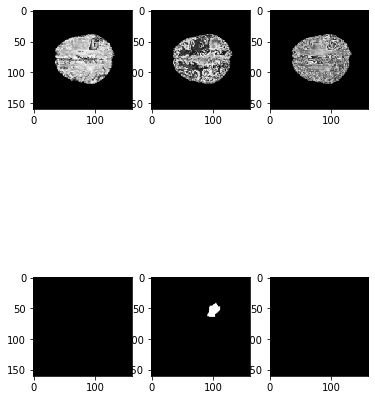

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline


for i, (input_images, input_seg) in enumerate(train_dataset):
    if i!=53:
        continue
    print(input_images.shape,input_seg.shape)
    fig, axes=plt.subplots(2,3,figsize=(6,9))
    axes[0,0].imshow(input_images[0],cmap='gray')
    axes[0,1].imshow(input_images[1],cmap='gray')
    axes[0,2].imshow(input_images[2],cmap='gray')
    axes[1,0].imshow(input_seg[0],cmap='gray')
    axes[1,1].imshow(input_seg[1],cmap='gray')
    axes[1,2].imshow(input_seg[2],cmap='gray')
    fig.show()
    print(input_seg[1])
    break

In [2]:
from PIL import Image
import numpy as np
import nibabel as nib

file_path='dataset/segmentation/BraTS20_Training_001_seg.nii.gz113.png'
image=Image.open('dataset/segmentation/BraTS20_Training_001_seg.nii.gz113.png')
arr=np.array(image)
imgVol = nib.load(file_path)
npdata = imgVol.get_fdata()
npdata=npdata.astype(np.uint8)
        

x=npdata.shape[0]
y=npdata.shape[1]
n=npdata.shape[2]
array=np.zeros((x,y,3,n))
array[:,:,0,:]=np.where(npdata==1,255*np.ones((x,y,n)),np.zeros((x,y,n)))
array[:,:,1,:]=np.where(npdata==2,255*np.ones((x,y,n)),np.zeros((x,y,n)))
array[:,:,2,:]=np.where(npdata==4,255*np.ones((x,y,n)),np.zeros((x,y,n)))
array=array.astype(np.uint8)
print(array.shape)
plt.imshow(array[:,:,:,51])
write_gif(array.transpose((3,0,1,2)),f'movie{i}.gif',fps=300)
# array[:,:,0,:]=np.where(arr==1,255*np.ones((x,y,n)),np.zeros((x,y,n)))
# plt.imshow(arr)
# plt.show()
# print(np.unique(arr))


ImageFileError: Cannot work out file type of "dataset/segmentation/BraTS20_Training_001_seg.nii.gz113.png"